In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv("youth_opinions_3.csv")
smucolors = ["#151C55","#8A704C"]

for col in df:
    #get dtype for column
    dt = df[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        df[col] = df[col].fillna(0)
    else:
        df[col] = df[col].fillna("-")
        
df.shape

(74, 20)

In [37]:
df.sample(20)

,Gender,Faculty/School,Are you an Undergraduate or a Postgraduate?,Year,Have you cleared your Community Service Programme (CSP) requirement?,How did you clear your CSP requirement? Please give a short description.,How are you planning to clear your CSP requirement?,Do you often see elderly in SMU or around SMU?Rate from 1 to 4 where 1 - Not at all and 4 - Very often - Frequency of seeing elderly in SMU or around SMU,"From your observation, what do the elderly usually do in SMU or around SMU?",Do you know that there are many elderly living near SMU such as Bras Basah Complex and Waterloo area?,"Other than your grandparents, how often do you interact with the elderly?Rate from 1 to 4 where 1 - Not at all and 4 - Very often - Frequency of interacting with elderly",Do you face any difficulties interacting with elderly?,What difficulties do you face?,Are you interested to participate in a local CSP at elderly centres?,What do you think about developing SMU and the area around it as an Intergenerational Hub?\nOur Vision of Intergenerational Hub: Elderly coming to SMU and facilities are available to promote healthy and active ageing as well as promote intergenerational interaction between elderly and youth.,Please elaborate for your choice in the previous question.,What benefits do you think SMU will get for branding itself as an Intergenerational Hub for youth and the elderly?,Do you think this Intergenerational Hub initiative will disrupt students' daily lives?,Please elaborate for your choice in the previous question..1,Are you interested to participate in local CSPs which are to be conducted in SMU or around SMU?Rate from 1 to 4 where 1 - Not at all and 4 - Very interested - Interest level
32,Female,School of Social Sciences,Undergraduate,Year 2,No,-,Local CSP,3,Working as cleaners or in Koufu. Some sit at t...,No,1,Yes,"Not knowing how to speak or understand dialects,",Yes,That's good!,I think it will be a good idea to leverage on ...,"Nothing much in return, other than appeal to s...",No,I think it might but can be mitigated so that ...,3
58,Female,School of Business,Undergraduate,Year 3,Yes,OCSP to Vietnam. Winter series,-,2,-,Yes,2,No,-,Yes,That's good!,I think it's an interesting view especially fo...,Definitely will have a good reputation. I thin...,No,"I don't think it will disrupt. In fact, I thin...",4
35,Male,School of Information Systems,Postgraduate,-,I do not need to,-,-,2,-,Yes,2,No,-,Yes,That's an excellent idea!,"Because wisdom comes with age and experience, ...",Better recognition and image rating,No,"As long as it is voluntary, no reason that it ...",2
45,Female,School of Business,Undergraduate,Year 4,Yes,Through local CSP,-,4,"Cleaners, Security guards and many homeless on...",Yes,2,No,-,Yes,That's good!,"Hmm, I guess it really depends. Sometimes it m...",Hm... Not sure why need to brand itself as an ...,No,"Hmm why would it though. If one cares enough, ...",3
63,Female,School of Law,Undergraduate,Year 4,Yes,Inspirar and starring,-,2,-,No,1,No,-,Yes,That's an excellent idea!,"Since there's so many elderly nearby, it is go...",Character development,No,It will help them grow instead of disrupting,4
18,Female,School of Information Systems,Undergraduate,Year 1,No,-,no idea :'),3,some are not elderly but within the age range ...,Yes,1,Yes,they often speak dialect which i cannot unders...,Yes,Not bad,I am not so sure about an intergenerational hu...,"hm, depends? either smu as an academic institu...",Yes,"actually, this entirely depends on what you ai...",3
73,Male,School of Information Systems,Undergraduate,Year 4,Yes,Habitat for Humanity | Food of Love,-,2,-,No,2,No,-,Yes,That's good!,It will give SMU students an opportunity to de...,A university that cares for the people around ...,No,Highly unlikely that it will affect students a...,3
22,Female,School of Business,Undergraduate,Year 1,No,-,local CSP,2,-,No,1,Yes,Language issues,Yes,That's good!,SMU is centralised so is convenient for both t...,Image?,No,-,4
72,Mal

In [38]:
df.columns

Index(['Gender', 'Faculty/School',
       'Are you an Undergraduate or a Postgraduate?', 'Year',
       'Have you cleared your Community Service Programme (CSP)  requirement?',
       'How did you clear your CSP requirement? Please give a short description.',
       'How are you planning to clear your CSP requirement?',
       'Do you often see elderly in SMU or around SMU?Rate from 1 to 4 where 1 - Not at all and 4 - Very often - Frequency of seeing elderly in SMU or around SMU',
       'From your observation, what do the elderly usually do in SMU or around SMU?',
       'Do you know that there are many elderly living near SMU such as Bras Basah Complex and Waterloo area?',
       'Other than your grandparents, how often do you interact with the elderly?Rate from 1 to 4 where 1 - Not at all and 4 - Very often - Frequency of interacting with elderly',
       'Do you face any difficulties interacting with elderly?',
       'What difficulties do you face?',
       'Are you interested to 

In [39]:
#renamed columns

df.columns = ['gender','faculty','ug_pg','year','csp_cleared','cleared_mode',
              'clearing_plan','freq_see_elderly','elderly_do','knowledge_elderly_pop','freq_interact_w_elderly',
              'difficulties_interacting','difficulties_face','interest_participate_elderly_center_csp','thoughts_inter_hub','thoughts','brand',
              'disrupt_student_lives','disrupt_reason','interest_csp_elderly_smu']

df['csp_cleared'] = (df['csp_cleared'] == 'Yes' ).astype(int)
print(df['csp_cleared'].value_counts())


df['knowledge_elderly_pop'] = (df['knowledge_elderly_pop'] == 'Yes' ).astype(int)
print(df['knowledge_elderly_pop'].value_counts())

df['difficulties_interacting'] = (df['difficulties_interacting'] == 'Yes' ).astype(int)
print(df['difficulties_interacting'].value_counts())

df['interest_participate_elderly_center_csp'] = (df['interest_participate_elderly_center_csp'] == 'Yes' ).astype(int)
print(df['interest_participate_elderly_center_csp'].value_counts())




1    42
0    32
Name: csp_cleared, dtype: int64
0    43
1    31
Name: knowledge_elderly_pop, dtype: int64
0    41
1    33
Name: difficulties_interacting, dtype: int64
1    48
0    26
Name: interest_participate_elderly_center_csp, dtype: int64


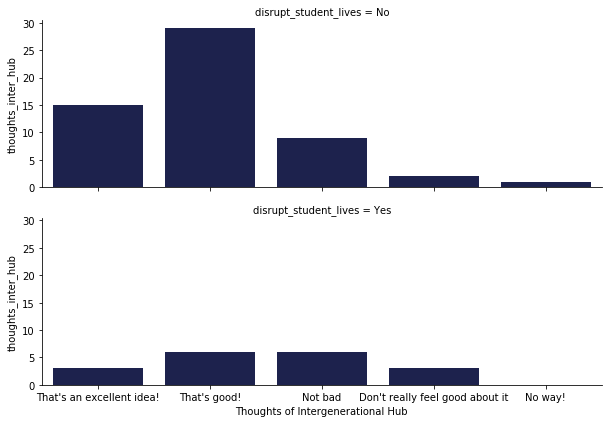

In [40]:
inter_hub_order = ["That's an excellent idea!","That's good!","Not bad","Don't really feel good about it","No way!"]
g = sns.FacetGrid(df,col="disrupt_student_lives",aspect=2.8,height=3,col_wrap=1)
g.map(sns.countplot,"thoughts_inter_hub",order=inter_hub_order,color="#151C55")
g.set_axis_labels("Thoughts of Intergenerational Hub", "thoughts_inter_hub");

In [41]:

#Encode the thoughts on intergenerational hub
def encode_score(data):
    if data == "That's an excellent idea!":
        return 4
    if data == "That's good!":
        return 3
    if data == "Not bad":
        return 2
    if data == "Don't really feel good about it":
        return 1
    if data == "No way!":
        return 0
    
def encode_gender(data):
    if data == "Male":
        return 1
    if data == "Female":
        return 0


df['disrupt_student_lives'] = (df['disrupt_student_lives'] == 'Yes' ).astype(int)
print(df['disrupt_student_lives'].value_counts())

    
df["gender"] = df["gender"].apply(encode_gender)
df["gender"] = df["gender"].astype(int)
df['thoughts_inter_hub'] = df['thoughts_inter_hub'].apply(encode_score)
df['thoughts_inter_hub'] = df['thoughts_inter_hub'].astype(int)

0    56
1    18
Name: disrupt_student_lives, dtype: int64


In [42]:
df["faculty"].value_counts()

School of Information Systems    38
School of Business               18
School of Social Sciences         9
School of Accountancy             7
School of Law                     1
School of Economics               1
Name: faculty, dtype: int64

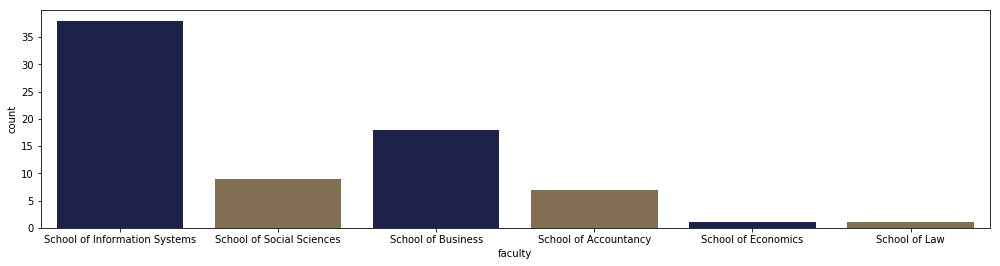

In [43]:
smucolors = ["#151C55","#8A704C"]

plt.figure(figsize=(17,4))

sns.countplot(df["faculty"],palette=smucolors)


In [44]:
df.dtypes

gender                                      int64
faculty                                    object
ug_pg                                      object
year                                       object
csp_cleared                                 int64
cleared_mode                               object
clearing_plan                              object
freq_see_elderly                            int64
elderly_do                                 object
knowledge_elderly_pop                       int64
freq_interact_w_elderly                     int64
difficulties_interacting                    int64
difficulties_face                          object
interest_participate_elderly_center_csp     int64
thoughts_inter_hub                          int64
thoughts                                   object
brand                                      object
disrupt_student_lives                       int64
disrupt_reason                             object
interest_csp_elderly_smu                    int64


In [45]:
elderly_related = df["cleared_mode"]+ df["clearing_plan"]

words_related = "elderly|Inspirar|old folks"

elderly_related_count = elderly_related.str.contains(words_related).value_counts()[True]
print("Number of students who did/plans to do elderly related CSP: ",elderly_related_count)
print("Percentage/Probability of doing elderly related csp: ",elderly_related_count/len(elderly_related) * 100,'%')

might_be_words_related = "Uni-Y|uniy|uni-y|rotaract|Rotaract"

count = elderly_related.str.contains(might_be_words_related).value_counts()[True]
print("Number of students who might have done or plan to do elderly related CSP: ",count)
print("Percentage/Probability who might have done or plan to do elderly related csp: ",count/len(elderly_related) * 100,'%')

def score_csp_elderly(data):
    words_related = ["elderly","Inspirar","old","folks"]
    might_be_words_related = ["Uni-Y","uniy","uni-y","rotaract","Rotaract"]
    if any(word in data for word in words_related):
        return 2
    elif any(word in data for word in might_be_words_related):
        return 1
    return 0

df["csp_elderly_related"] = elderly_related.apply(score_csp_elderly)
#df["csp_is_elderly_related"]

df.dtypes

Number of students who did/plans to do elderly related CSP:  8
Percentage/Probability of doing elderly related csp:  10.81081081081081 %
Number of students who might have done or plan to do elderly related CSP:  6
Percentage/Probability who might have done or plan to do elderly related csp:  8.108108108108109 %


gender                                      int64
faculty                                    object
ug_pg                                      object
year                                       object
csp_cleared                                 int64
cleared_mode                               object
clearing_plan                              object
freq_see_elderly                            int64
elderly_do                                 object
knowledge_elderly_pop                       int64
freq_interact_w_elderly                     int64
difficulties_interacting                    int64
difficulties_face                          object
interest_participate_elderly_center_csp     int64
thoughts_inter_hub                          int64
thoughts                                   object
brand                                      object
disrupt_student_lives                       int64
disrupt_reason                             object
interest_csp_elderly_smu                    int64


<Figure size 360x1080 with 0 Axes>

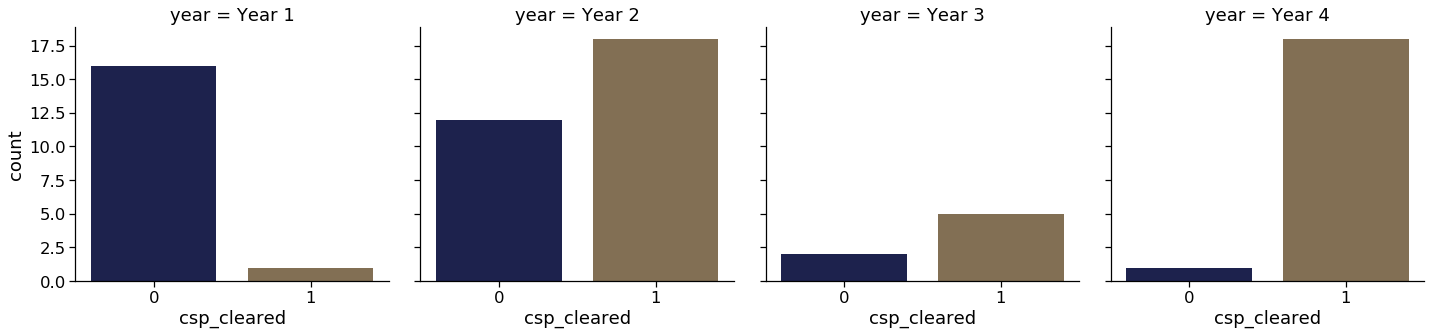

In [46]:

plt.figure(figsize=[5,15])
csp_cleared_df = df.loc[df["year"] != "-"]
csp_cleared_df["year"].value_counts() #exclude post grad students since they not required to do it

with sns.plotting_context("notebook",font_scale=1.5):
    sns.catplot(data=csp_cleared_df,x="csp_cleared",kind="count",col="year",col_order=["Year 1","Year 2", "Year 3", "Year 4"],palette=smucolors)



In [47]:
len(csp_cleared_df.loc[csp_cleared_df["csp_cleared"]==0])

31

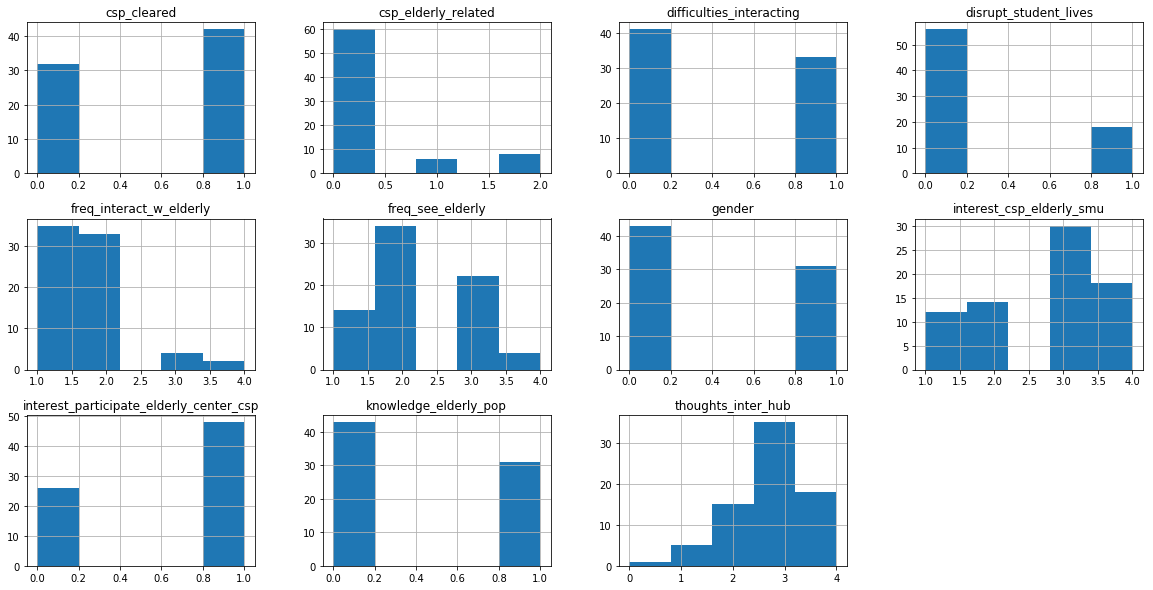

In [48]:
#See distribution of data
df.hist(bins=5, figsize=(20, 10), layout=(3, 4));

In [49]:
def remove_year_text(data):
    if data == "-":
        return 0
    data = data.replace("Year","")
    data = int(data)
    return data

df["year"] = df["year"].apply(remove_year_text)
df["year"] = df["year"].astype(int)

In [50]:
df.sample(5)

,gender,faculty,ug_pg,year,csp_cleared,cleared_mode,clearing_plan,freq_see_elderly,elderly_do,knowledge_elderly_pop,...,difficulties_interacting,difficulties_face,interest_participate_elderly_center_csp,thoughts_inter_hub,thoughts,brand,disrupt_student_lives,disrupt_reason,interest_csp_elderly_smu,csp_elderly_related
20,0,School of Business,Undergraduate,1,0,-,Local CSP!,3,Usually they are our cleaners/kopitiam workers!,1,...,1,There is a clear language barrier and uncertai...,1,4,"I think with our ageing population, having int...",I think it shows that SMU is interested in giv...,0,I think the elderly are less likely to scream ...,4,0
25,1,School of Information Systems,Undergraduate,2,1,Inspirar camp freshman and facilitator,-,2,-,1,...,0,-,1,4,"As singapore is facing an ageing population, w...",We will be seen as a leading example of promot...,0,There is always time to do things that you are...,4,2
0,0,School of Information Systems,Undergraduate,2,0,-,Local projects,1,-,0,...,0,-,1,3,-,Community involevement,0,-,4,0
36,1,School of Business,Undergraduate,4,1,Facilitated for external camp organised by CAR...,-,2,-,1,...,0,-,0,1,I think that SMU facilities should be reserved...,"Honestly, we will only just be recognised as t...",1,"As mentioned in the previous question, invitin...",1,0
18,0,School of Information Systems,Undergraduate,1,0,-,no idea :'),3,some are not elderly but within the age range ...,1,...,1,they often speak dialect which i cannot unders...,1,2,I am not so sure about an intergenerational hu...,"hm, depends? either smu as an academic institu...",1,"actually, this entirely depends on what you ai...",3,0


In [51]:
df.dtypes

gender                                      int64
faculty                                    object
ug_pg                                      object
year                                        int64
csp_cleared                                 int64
cleared_mode                               object
clearing_plan                              object
freq_see_elderly                            int64
elderly_do                                 object
knowledge_elderly_pop                       int64
freq_interact_w_elderly                     int64
difficulties_interacting                    int64
difficulties_face                          object
interest_participate_elderly_center_csp     int64
thoughts_inter_hub                          int64
thoughts                                   object
brand                                      object
disrupt_student_lives                       int64
disrupt_reason                             object
interest_csp_elderly_smu                    int64


In [52]:
df["csp_elderly_related"].sample(10)

53    0
61    1
1     0
3     0
15    0
11    2
46    1
66    0
29    0
57    0
Name: csp_elderly_related, dtype: int64

In [54]:
def categories_interest(data):
    if data == 4:
        return "Very High"
    if data == 3:
        return "High"
    if data == 2:
        return "Low"
    if data == 1:
        return "Very Low"

def categories_interaction_w_elderly(data):
    if data == 4:
        return "Very often"
    if data == 3:
        return "Often"
    if data == 2:
        return "Seldom"
    if data == 1:
        return "Not at All"

df["interest_csp_elderly_categorized"] = df["interest_csp_elderly_smu"].apply(categories_interest)
#df["interest_csp_elderly_categorized"]


df["interact_w_elderly_categorized"] = df["freq_interact_w_elderly"].apply(categories_interaction_w_elderly)
df["interact_w_elderly_categorized"]

0     Very often
1     Not at All
2     Not at All
3     Not at All
4     Not at All
         ...    
69    Not at All
70    Not at All
71        Seldom
72        Seldom
73        Seldom
Name: interact_w_elderly_categorized, Length: 74, dtype: object

[Text(0.5,0,'Frequency of Interacting with Elderly')]

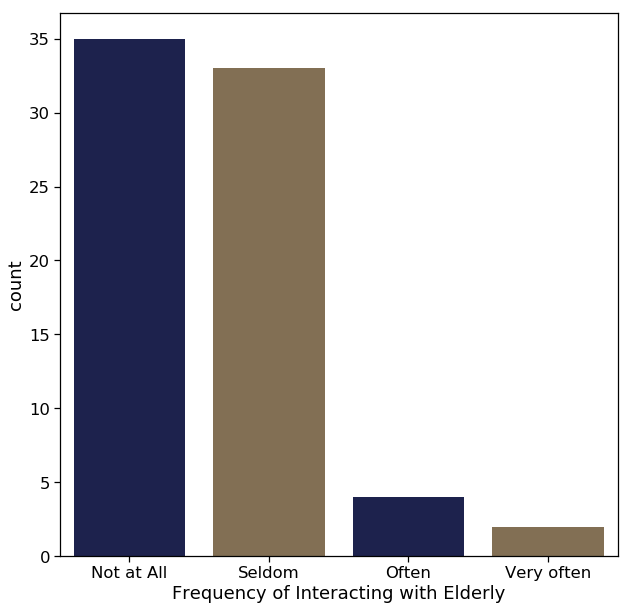

In [55]:
plt.figure(figsize=(10,10))
with sns.plotting_context("notebook",font_scale=1.5):
    g =sns.countplot(df["interact_w_elderly_categorized"],order=["Not at All","Seldom","Often","Very often"],palette=smucolors)
g.set(xlabel="Frequency of Interacting with Elderly")

In [61]:
df["interest_csp_elderly_categorized"].value_counts(1)

High         0.405405
Very High    0.243243
Low          0.189189
Very Low     0.162162
Name: interest_csp_elderly_categorized, dtype: float64

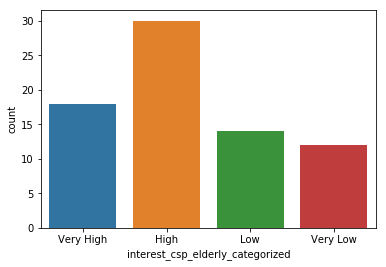

In [57]:
sns.countplot(df["interest_csp_elderly_categorized"])

Text(0.5,0.98,'Relationship of Interacting with Elderly vs Interest with Elderly CSP ')

<Figure size 360x2880 with 0 Axes>

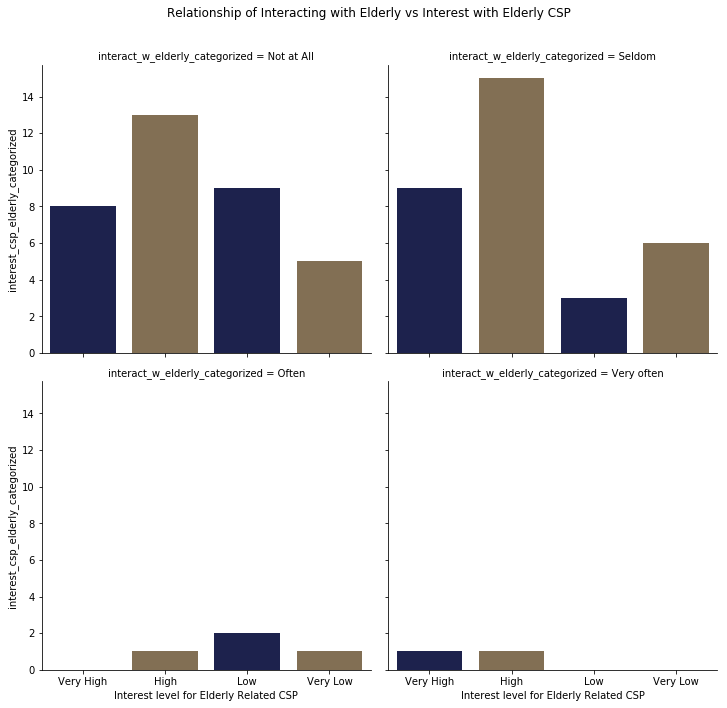

In [58]:
plt.figure(figsize=[5,40])

ax = sns.catplot(col_wrap= 2,x="interest_csp_elderly_categorized", kind="count", data=df,col="interact_w_elderly_categorized",col_order=["Not at All","Seldom","Often","Very often"],palette=smucolors)
plt.subplots_adjust(top=0.9)
ax.set_axis_labels("Frequency of Interacting with Elderly", "interact_w_elderly_categorized");
ax.set_axis_labels("Interest level for Elderly Related CSP", "interest_csp_elderly_categorized");
ax.fig.suptitle("Relationship of Interacting with Elderly vs Interest with Elderly CSP ")


In [59]:
print(df["interest_csp_elderly_categorized"].value_counts(1))

High         0.405405
Very High    0.243243
Low          0.189189
Very Low     0.162162
Name: interest_csp_elderly_categorized, dtype: float64


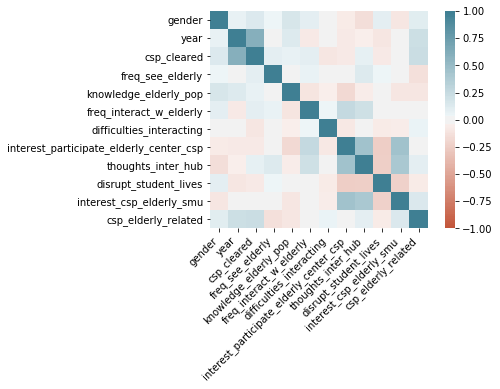

In [220]:
#Correlation of variables in the data
corr = df.corr()

ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [221]:
corr.round(5)

,gender,year,csp_cleared,freq_see_elderly,knowledge_elderly_pop,freq_interact_w_elderly,difficulties_interacting,interest_participate_elderly_center_csp,thoughts_inter_hub,disrupt_student_lives,interest_csp_elderly_smu,csp_elderly_related
gender,1.00000,0.07519,0.13299,0.04387,0.16729,0.08933,0.00968,-0.06358,-0.14555,0.09317,-0.09880,0.11694
year,0.07519,1.00000,0.60815,0.02031,0.12357,-0.07603,0.03375,-0.07162,-0.04596,-0.09248,0.01221,0.22461
csp_cleared,0.13299,0.60815,1.00000,0.09831,0.07770,0.08948,-0.09492,-0.07104,0.08062,-0.07732,-0.01762,0.23066
freq_see_elderly,0.04387,0.02031,0.09831,1.00000,0.01005,0.06683,0.02903,-0.01322,0.13200,0.04309,0.02201,-0.12173
knowledge_elderly_pop,0.16729,0.12357,0.07770,0.01005,1.00000,-0.10396,-0.04542,-0.17832,-0.05479,-0.03451,-0.09880,-0.09310
freq_interact_w_elderly,0.08933,-0.07603,0.08948,0.06683,-0.10396,1.00000,0.03993,0.26023,0.21808,-0.01922,0.03235,0.00079
difficulties_interacting,0.00968,0.03375,-0.09492,0.02903,-0.04542,0.03993,1.00000,-0.08003,-0.01623,-0.06508,-0.05635,0.04958
interest_participate_elderly_center_csp,-0.06358,-0.07162,-0.07104,-0.01322,-0.17832,0.26023,-0.08003,1.00000,0.45296,-0.24251,0.45034,0.03168
thoughts_inter_hub,-0.14555,-0.04596,0.08062,0.13200,-0.05479,0.21808,-0.01623,0.45296,1.00000,-0.22850,0.40584,0.09096
disrupt_student_lives,0.09317,-0.09248,-0.07732,0.04309,-0.03451,-0.01922,-0.06508,-0.24251,-0.22850,1.00000,-0.22384,-0.06528


In [76]:
students_w_difficulty_interacting = df.loc[df["difficulties_interacting"]==1]

students_w_difficulty_interacting["freq_interact_w_elderly"].value_counts(1)

2    0.484848
1    0.424242
3    0.090909
Name: freq_interact_w_elderly, dtype: float64

In [71]:
df["freq_interact_w_elderly"].head(15)

0     4
1     1
2     1
3     1
4     1
5     1
6     4
7     2
8     2
9     1
10    1
11    1
12    2
13    1
14    1
Name: freq_interact_w_elderly, dtype: int64

In [222]:
x_cols = ["gender","freq_see_elderly","knowledge_elderly_pop","freq_interact_w_elderly","difficulties_interacting","disrupt_student_lives","thoughts_inter_hub"]
y_col = "interest_csp_elderly_smu"

series = []

for col in x_cols:
    series.append(df[col])

x_df = pd.concat(series,axis=1)
x_df.head(20)

,gender,freq_see_elderly,knowledge_elderly_pop,freq_interact_w_elderly,difficulties_interacting,disrupt_student_lives,thoughts_inter_hub
0,0,1,0,4,0,0,3
1,0,2,0,1,0,0,1
2,0,1,0,1,0,0,3
3,0,1,1,1,0,0,3
4,0,3,0,1,0,0,4
5,0,1,0,1,0,1,2
6,1,3,0,4,0,1,3
7,1,1,0,2,0,0,3
8,1,2,1,2,0,0,4
9,1,2,0,1,1,1,1


In [223]:
#If user indicates 3 or more it means they are keen to explore elderly related CSP in SMU
def prep_class_labels(data):
    if data >= 3:
        return 1
    else:
        return 0

    
x_data = x_df
prepped_y = df[y_col].apply(prep_class_labels)
y_data = prepped_y



0    56
1    18
Name: disrupt_student_lives, dtype: int64


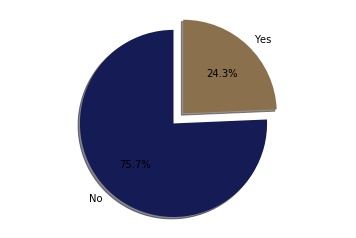

In [224]:
values = x_df["disrupt_student_lives"].value_counts()

print(values)

labels = 'No','Yes'
sizes = [values[0],values[1]]
explode = (0.15,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()